<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Ejemplo_4_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="cojinete.png">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [6]:
interferencia()

1

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [7]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [8]:
X = prob_inter(100000)                # Asignamos valores a n y realizamos el experimento

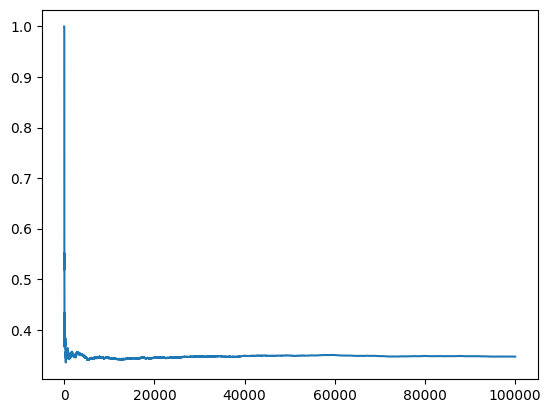

In [9]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [10]:
print(np.mean(X), np.std(X))

0.3474541551337103 0.00662294759167695


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [11]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [14]:
Y=modelo(1000)

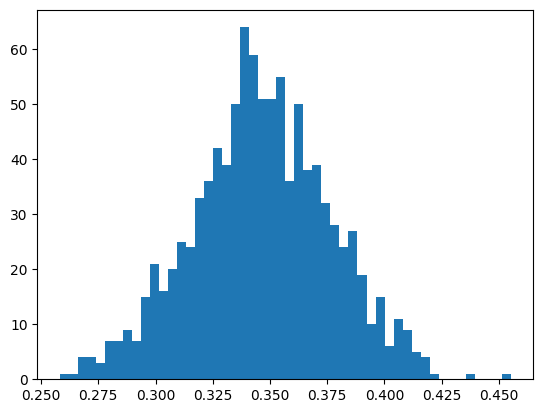

In [17]:
plt.hist(Y,bins=50)
plt.show()

In [18]:
print(np.mean(Y), np.std(Y))

0.34625308957386813 0.03018547728239117


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

JUSTIFICACION

Se puede obtener asi el intervalo de confianza debido a lo siguiente:

Sabemos que si $X \thicksim N(\mu , \sigma)$, haciendo $Z = \frac{X- \mu}{\sigma}$, entonces $Z \thicksim N(0,1)$, si se tiene una muestra en donde no se tiene claro la informacion de toda la poblacion y se busca estimar media y desviacion poblacional con la muestra, entonces:

$\bar{X} \thicksim N(\bar{x},\frac{s}{\sqrt{n}})$, la $z$ que se obtenga de estandarizar $\bar{X}$, tendra un nivel de significancia o "error" $\alpha$, entonces al estandarizar, tenemos:

$z_{\frac{\alpha}{2}} = \frac{\bar{X}-\bar{x}}{\frac{s}{\sqrt{n}}}$, despejando:

$\bar{X} = \bar{x} \pm z_{\frac{\alpha}{2}} \frac{s}{\sqrt{n}}$, finalmente, para estimar media poblacional:

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [19]:
np.mean(Y)

0.34625308957386813

In [20]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3378861021474135, 0.3546200770003228)

Con un $95\%$ de confianza, el valor de la probabilidad de interferencia al simular se encuentra entre $(0.337886,0.354620)$

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [21]:
N = (2*np.std(X)*1.96/0.01)**2

In [22]:
print(N)

6.740230845429818


### Podemos comparar con la solución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal, o en este caso especifico, la resta, utilizando el siguiente teorema.

Teorema: 

Si $X_1 \thicksim N(\mu_1,\sigma_1)$ y $X_2 \thicksim N(\mu_2,\sigma_2)$, entonces:

$X_2 - X_1 \thicksim N(\mu_2 - \mu_1,\sqrt{\sigma_1^2 + \sigma_2^2})$

Para este ejemplo:

$X_2 - X_1 \thicksim N(-0.02,0.05)$

Estamos buscando:

$P(X_2 - X_1) > 0$

Estandarizamos la normal obtenida, para escribir la variable en terminos de Z:

$\frac{(X_2 - X_1) + 0.02}{0.05} > \frac{0.02}{0.05}$

Escribiendo:

$Z = \frac{(X_2 - X_1) + 0.02}{0.05}$

Entonces, buscamos:

$P(Z > 0.24)$

Utilizando las propiedades de la probabilidad, obtenemos

$= 1 - P(Z \leq 0.24)$

$= 1 - 0.6554$

$= 0.3446 = 34.46 \%$  de probabilidad de que haya interferencia

Que comprobando arriba, es un resultado bastante similar al obtenido por simulacion.

Comprobamos calculando su acumulativa:

In [25]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [26]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.0016748311841923158

Obteniendo un resultado similar practicamente igual a la solucion analitica, lo que confirma nuestra solucion y nos dice que la estimacion por simulacion es buena.